<a href="https://colab.research.google.com/github/tshabalalasibongile/Molecular-Information/blob/main/hydrcarbons_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sibongile Tshabalala (2356121)

# **Hydrocarbon Heat Dynamic Predictions Using RDKIT and Machine Learning**

# **Introduction**

In this assignment, we explore the use of RDKIT in conjuction with machine learning to model the molecular dynamic of hydrocarbons. Hydrocarbons compounds composedsolely of carbon and hydrogen are essention fuels. Understanding their melting and boiling points is crucial to studying their thermodynamic behaviour.

The dataset includes each molecule's SMILES representation, allowing us to extract chemical descriptors are then used to train regression models that predict the melting and boiling points of hydrocarbons

# **Data Preprocessing**

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 51.7 MB/s eta 0:00:00


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors

In [ ]:
#Load dataset
file_path = "hydrocarbons.csv"
df = pd.read_csv(file_path)
df.head()

,Class of hydrocarbon,IUPAC name,Melting point,Boiling point,Density,Flash point,Autoignition temp,pubchem_id,smiles
0,Trimetylalkane,"2,2,4-Trimethylpentane",-107.0,99.0,0.69,NaN,396,10907,CC(C)CC(C)(C)C
1,Triaromatics,Phenanthrene,99.0,338.0,1.18,171,>450,995,C1=CC=C2C(=C1)C=CC3=CC=CC=C32
2,Triaromatics,Anthracene,216.0,341.0,1.2825,NaN,NaN,8418,C1=CC=C2C=C3C=CC=CC3=CC2=C1
3,Triaromatics,1-methylanthracene,86.0,342.0,1.04799,NaN,NaN,11884,CC1=CC=CC2=CC3=CC=CC=C3C=C12
4,Triaromatics,2-methylanthracene,209.0,340.0,1.8,NaN,NaN,11936,CC1=CC2=CC3=CC=CC=C3C=C2C=C1


# **Extracting Molecular Information Using RDKit**

In [ ]:
#Initialize descriptor lists
atomic_weights = []
aromatic_rings = []


In [ ]:
for i, row in df.iterrows():
    smiles = row['smiles']
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
      atomic_weight = Descriptors.ExactMolWt(mol)
      num_aromatic_rings = Descriptors.NumAromaticRings(mol)
    else:
      atomic_weight = None
      num_aromatic_rings = None
    atomic_weights.append(atomic_weight)
    aromatic_rings.append(num_aromatic_rings)


In [ ]:
#Adding to DataFrame
df['atomic_weight'] = atomic_weights
df['aromatic_rings'] = aromatic_rings

df.head()

,Class of hydrocarbon,IUPAC name,Melting point,Boiling point,Density,Flash point,Autoignition temp,pubchem_id,smiles,atomic_weight,aromatic_rings
0,Trimetylalkane,"2,2,4-Trimethylpentane",-107.0,99.0,0.69,NaN,396,10907,CC(C)CC(C)(C)C,114.140851,0
1,Triaromatics,Phenanthrene,99.0,338.0,1.18,171,>450,995,C1=CC=C2C(=C1)C=CC3=CC=CC=C32,178.078250,3
2,Triaromatics,Anthracene,216.0,341.0,1.2825,NaN,NaN,8418,C1=CC=C2C=C3C=CC=CC3=CC2=C1,178.078250,3
3,Triaromatics,1-methylanthracene,86.0,342.0,1.04799,NaN,NaN,11884,CC1=CC=CC2=CC3=CC=CC=C3C=C12,192.093900,3
4,Triaromatics,2-methylanthracene,209.0,340.0,1.8,NaN,NaN,11936,CC1=CC2=CC3=CC=CC=C3C=C2C=C1,192.093900,3


RDKit successfully extracted two key molecular descriptors: atomic weight and the number of aromatic rings. These descriptors quantify the size and structural complexity of each hydrocarbon molecule, providing the foundational features needed for predictive modeling. The atomic weight increases with molecular size, while aromatic rings indicate structural rigidity. These properties are expected to influence melting and boiling behavior since heavier and more aromatic molecules generally exhibit higher thermal stability.

# **Data Cleaning**

In [ ]:
#Create new dataset for regression
model_df = df[['atomic_weight', 'aromatic_rings', 'Melting point', 'Boiling point']]
model_df

,atomic_weight,aromatic_rings,Melting point,Boiling point
0,114.140851,0,-107.0,99.0
1,178.078250,3,99.0,338.0
2,178.078250,3,216.0,341.0
3,192.093900,3,86.0,342.0
4,192.093900,3,209.0,340.0
...,...,...,...,...
189,224.250401,0,4.0,285.0
190,238.266051,0,11.0,301.0
191,252.281701,0,18.0,316.0
192,266.297351,0,23.0,331.0


In [ ]:

df.isnull().sum()

,0
Class of hydrocarbon,0
IUPAC name,0
Melting point,6
Boiling point,4
Density,5
Flash point,117
Autoignition temp,131
pubchem_id,0
smiles,0
atomic_weight,0


In [ ]:
#Drop missing values
model_cleaned = model_df.dropna()
model_cleaned.head()

,atomic_weight,aromatic_rings,Melting point,Boiling point
0,114.140851,0,-107.0,99.0
1,178.078250,3,99.0,338.0
2,178.078250,3,216.0,341.0
3,192.093900,3,86.0,342.0
4,192.093900,3,209.0,340.0


Rows with missing melting and boiling point values were removed to ensure consistent and reliable input data. This step reduced noise and potential bias in model training. However, it also slightly decreased the dataset size, which may limit generalization. The cleaned dataset now includes only complete observations, allowing accurate evaluation of model performance without distortions caused by missing data.

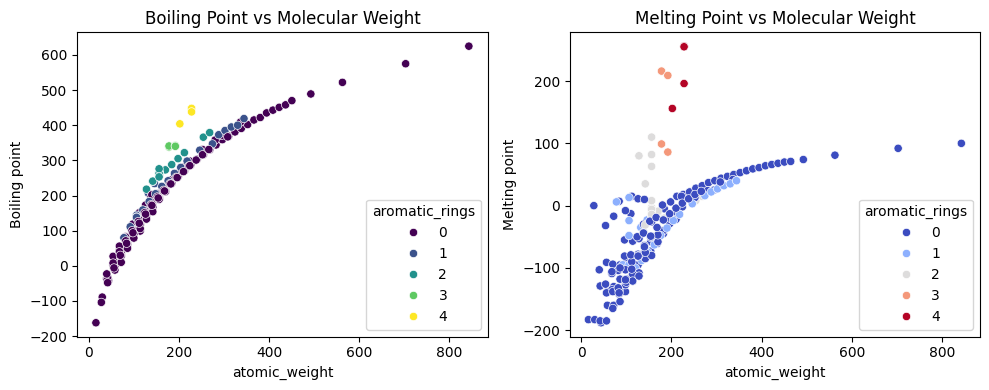

In [ ]:
# Exploratory Scatter Plots
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(data=df, x='atomic_weight', y='Boiling point', hue='aromatic_rings', ax=axes[0], palette='viridis')
axes[0].set_title("Boiling Point vs Molecular Weight")

sns.scatterplot(data=df, x='atomic_weight', y='Melting point', hue='aromatic_rings', ax=axes[1], palette='coolwarm')
axes[1].set_title("Melting Point vs Molecular Weight")

plt.tight_layout()
plt.show()

The scatter plots show visible upward trends between molecular weight and both boiling and melting points. Boiling point displays a clearer, more consistent positive correlation, suggesting it is largely dependent on molecular size. In contrast, melting point data appear more scattered, indicating additional structural factors such as molecular symmetry and intermolecular forces influence melting behavior. This observation suggests that a simple linear model may be insufficient to fully describe the relationship for melting points.

# **Model Preparation**

In [ ]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Split features and targets
X = model_cleaned[['atomic_weight', 'aromatic_rings']]
y_melting = model_cleaned['Melting point']
y_boiling = model_cleaned['Boiling point']

In [ ]:
#Train-test split
X_train, X_test, y_melting_train, y_melting_test = train_test_split(X, y_melting, test_size=0.2, random_state=1)
_, _, y_boiling_train, y_boiling_test = train_test_split(X, y_boiling, test_size=0.2, random_state=1)

# **Linear Regression**

In [ ]:
#Train Linear Regression models
melting_model = LinearRegression().fit(X_train, y_melting_train)
boiling_model = LinearRegression().fit(X_train, y_boiling_train)

In [ ]:
#Predict
melting_pred = melting_model.predict(X_test)
boiling_pred = boiling_model.predict(X_test)

In [ ]:
#Evaluate
melting_mse = mean_squared_error(y_melting_test, melting_pred)
boiling_mse = mean_squared_error(y_boiling_test, boiling_pred)
melting_r2 = r2_score(y_melting_test, melting_pred)
boiling_r2 = r2_score(y_boiling_test, boiling_pred)

In [ ]:
#Display evalution metrics
print("Linear Regression Results")
print('MSE:', melting_mse)
print('R2:', melting_r2)
print()
print('Boiling Point Model:')
print('MSE:', boiling_mse)
print('R2:', boiling_r2)

Linear Regression Results
MSE: 2425.7909485168598
R2: 0.5718119357199574

Boiling Point Model:
MSE: 2444.587449086594
R2: 0.8746926530242551


Linear Regression established the baseline model with an R² of 0.57 and MSE of 2425.79 for melting points, and an R² of 0.87 and MSE of 2444.59 for boiling points. The results show that the model performs reasonably well for boiling points but less so for melting points. This indicates that the relationship between molecular features and boiling behavior is more linear, while melting point variation involves more complex, nonlinear dependencies. Linear Regression captures general trends but misses finer structural details.

# **Polynomial Regression (Degree =3)**

In [ ]:
# Importing libraries
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [ ]:
# Generating polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
#Train Polynomial Regression
poly_melting_model = LinearRegression().fit(X_train_poly, y_melting_train)
poly_boiling_model = LinearRegression().fit(X_train_poly, y_boiling_train)

In [ ]:
#Predict
melting_poly_pred = poly_melting_model.predict(X_test_poly)
boiling_poly_pred = poly_boiling_model.predict(X_test_poly)

In [ ]:
#Evaluate
melting_poly_mse = mean_squared_error(y_melting_test, melting_poly_pred)
boiling_poly_mse = mean_squared_error(y_boiling_test, boiling_poly_pred)
melting_poly_r2 = r2_score(y_melting_test, melting_poly_pred)
boiling_poly_r2 = r2_score(y_boiling_test, boiling_poly_pred)

In [ ]:
# Displaying Evaluation Metrics
print('Polynomial Melting Point Model (degree=', poly.degree,'):')
print('MSE:', melting_poly_mse)
print('R2:', melting_poly_r2)
print()
print('Polynomial Boiling Point Model (degree=', poly.degree,'):')
print('MSE:', boiling_poly_mse)
print('R2:', boiling_poly_r2)

Polynomial Melting Point Model (degree= 3 ):
MSE: 1887.9733167735692
R2: 0.6667447207617332

Polynomial Boiling Point Model (degree= 3 ):
MSE: 278.21378784293745
R2: 0.9857390122575909


Polynomial Regression (degree 3) improved model performance significantly. The melting point R² increased to 0.67 with a reduced MSE of 1887.97, while the boiling point R² rose to 0.98 with a very low MSE of 278.21. This improvement confirms that the relationship between molecular descriptors and thermal properties is nonlinear. The polynomial model captures curved relationships more effectively, particularly for boiling points, showing that higher-order interactions between atomic weight and aromaticity influence the temperature at which hydrocarbons change phase.

# **Random Forest Regression**

In [ ]:
#Train Random Forest Regression
rf_melting = RandomForestRegressor(n_estimators=200, random_state=1)
rf_boiling = RandomForestRegressor(n_estimators=200, random_state=1)

rf_melting.fit(X_train, y_melting_train)
rf_boiling.fit(X_train, y_boiling_train)

RandomForestRegressor(n_estimators=200, random_state=1)

In [ ]:
#Predict
rf_melting_pred = rf_melting.predict(X_test)
rf_boiling_pred = rf_boiling.predict(X_test)

In [ ]:
#Evaluate
rf_melting_mse = mean_squared_error(y_melting_test, rf_melting_pred)
rf_boiling_mse = mean_squared_error(y_boiling_test, rf_boiling_pred)
rf_melting_r2 = r2_score(y_melting_test, rf_melting_pred)
rf_boiling_r2 = r2_score(y_boiling_test, rf_boiling_pred)


In [ ]:
#Displaying Evaluation Metrics
print('Random Forest Melting Point Model:')
print('MSE:', rf_melting_mse)
print('R2:', rf_melting_r2)
print('Random Forest Boiling Point Model:')
print('MSE:', rf_boiling_mse)
print('R2:', rf_boiling_r2)

Random Forest Melting Point Model:
MSE: 2193.599456123466
R2: 0.6127971763199391
Random Forest Boiling Point Model:
MSE: 400.5950575529668
R2: 0.9794658587925279


The Random Forest Regression model performed strongly with an R² of 0.61 and MSE of 2193.60 for melting points, and an R² of 0.98 and MSE of 400.59 for boiling points. Although its melting point prediction was slightly less accurate than the polynomial model, it achieved comparable performance for boiling points. Random Forest’s ability to model complex nonlinear relationships without explicit feature engineering highlights its flexibility and robustness. It confirms that ensemble methods can effectively handle molecular variability, especially for boiling point prediction.

# **Model Comparison**

In [ ]:
#Combine metrics into a table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (Degree =3)', 'Random Forest Regression'],
    'Melting Point MSE': [melting_mse, melting_poly_mse, rf_melting_mse],
    'Boiling Point MSE': [boiling_mse, boiling_poly_mse, rf_boiling_mse],
    'Melting Point R2': [melting_r2, melting_poly_r2, rf_melting_r2],
    'Boiling Point R2': [boiling_r2, boiling_poly_r2, rf_boiling_r2]
})

results

,Model,Melting Point MSE,Boiling Point MSE,Melting Point R2,Boiling Point R2
0,Linear Regression,2425.790949,2444.587449,0.571812,0.874693
1,Polynomial Regression (Degree =3),1887.973317,278.213788,0.666745,0.985739
2,Random Forest Regression,2193.599456,400.595058,0.612797,0.979466


The comparison table shows that both Polynomial and Random Forest models outperform Linear Regression for both targets. Polynomial Regression achieved the best overall metrics for melting points, while Random Forest matched or exceeded it for boiling points. This pattern suggests that while polynomial transformations effectively capture mathematical nonlinearity, Random Forest models can learn structural complexity directly from the data. Both nonlinear models demonstrate that hydrocarbon heat dynamics are not purely linear functions of molecular descriptors.

# **Visualization: Actual vs Predicted**

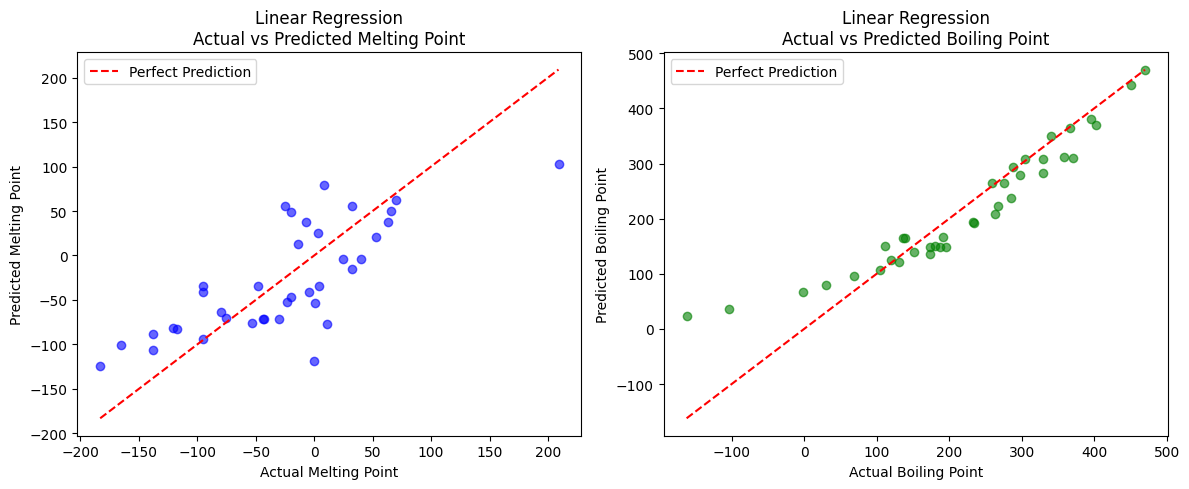

In [ ]:
# Linear Regression: Actual vs Predicted Visualization

plt.figure(figsize=(12, 5))

# Melting Point Plot
plt.subplot(1, 2, 1)
plt.scatter(y_melting_test, melting_pred, color='blue', alpha=0.6)
plt.plot([min(y_melting_test), max(y_melting_test)],
         [min(y_melting_test), max(y_melting_test)],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Linear Regression\nActual vs Predicted Melting Point')
plt.xlabel('Actual Melting Point')
plt.ylabel('Predicted Melting Point')
plt.legend()

# Boiling Point Plot
plt.subplot(1, 2, 2)
plt.scatter(y_boiling_test, boiling_pred, color='green', alpha=0.6)
plt.plot([min(y_boiling_test), max(y_boiling_test)],
         [min(y_boiling_test), max(y_boiling_test)],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Linear Regression\nActual vs Predicted Boiling Point')
plt.xlabel('Actual Boiling Point')
plt.ylabel('Predicted Boiling Point')
plt.legend()

plt.tight_layout()
plt.show()

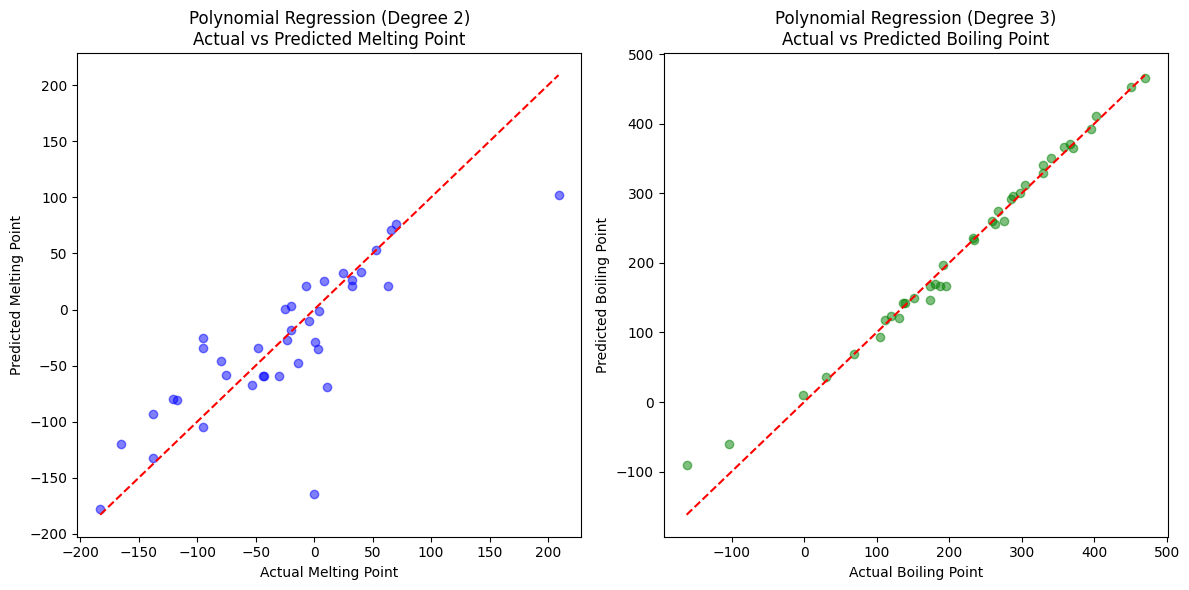

In [ ]:
# Plotting Polynomial Regression model
plt.figure(figsize=(12, 6))

# Plotting actual vs predicted values for melting point
plt.subplot(1, 2, 1)
plt.scatter(y_melting_test, melting_poly_pred, color='blue', alpha=0.5)
plt.plot([min(y_melting_test), max(y_melting_test)], [min(y_melting_test), max(y_melting_test)], color='red', linestyle='--')
plt.xlabel('Actual Melting Point')
plt.ylabel('Predicted Melting Point')
plt.title('Polynomial Regression (Degree 2)\nActual vs Predicted Melting Point')

# Plotting actual vs predicted values for boiling point
plt.subplot(1, 2, 2)
plt.scatter(y_boiling_test, boiling_poly_pred, color='green', alpha=0.5)
plt.plot([min(y_boiling_test), max(y_boiling_test)], [min(y_boiling_test), max(y_boiling_test)], color='red', linestyle='--')
plt.xlabel('Actual Boiling Point')
plt.ylabel('Predicted Boiling Point')
plt.title('Polynomial Regression (Degree 3)\nActual vs Predicted Boiling Point')

# Displaying the plots
plt.tight_layout()
plt.show()

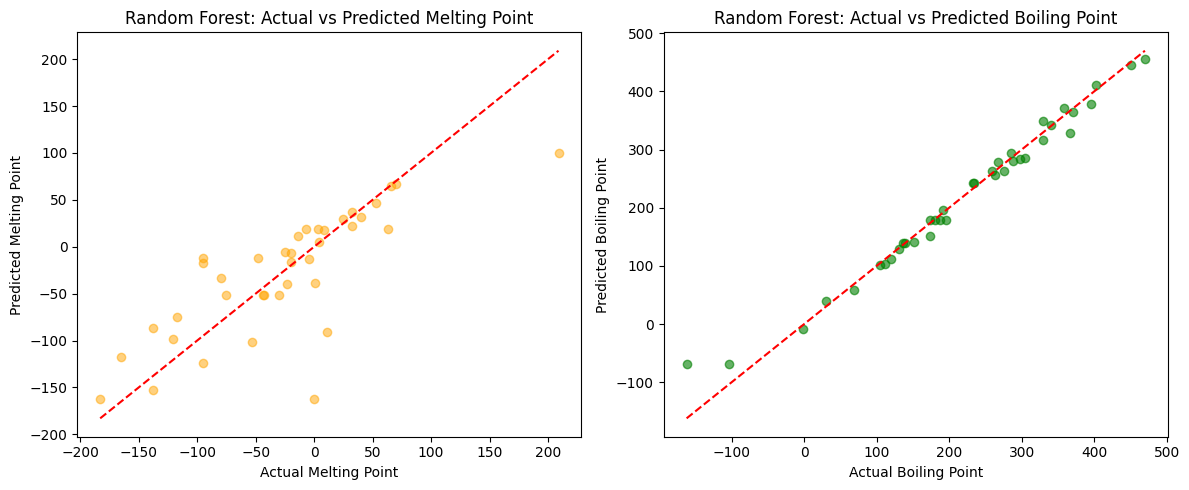

In [ ]:
#Plot for Boiling Point Prediction (best model)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_melting_test, rf_melting_pred, alpha=0.5, color='orange')
plt.plot([min(y_melting_test), max(y_melting_test)], [min(y_melting_test), max(y_melting_test)], 'r--')
plt.title('Random Forest: Actual vs Predicted Melting Point')
plt.xlabel('Actual Melting Point')
plt.ylabel('Predicted Melting Point')

plt.subplot(1, 2, 2)
plt.scatter(y_boiling_test, rf_boiling_pred, alpha=0.6, color='green')
plt.plot([min(y_boiling_test), max(y_boiling_test)], [min(y_boiling_test), max(y_boiling_test)], 'r--')
plt.title('Random Forest: Actual vs Predicted Boiling Point')
plt.xlabel('Actual Boiling Point')
plt.ylabel('Predicted Boiling Point')

plt.tight_layout()
plt.show()

The actual versus predicted plots visually confirm the numerical results. In the Linear Regression plots, the data points for both melting and boiling points are spread more widely around the red diagonal line, showing moderate predictive accuracy. The Polynomial Regression plots demonstrate a tighter clustering of points near the diagonal, particularly for boiling points, corresponding to the high R² of 0.98 and very low MSE of 278.21. The Random Forest plots show a similarly close alignment, indicating stable and accurate predictions across both targets. However, melting point predictions remain slightly more dispersed than boiling point predictions in all models, consistent with their lower R² values (0.61–0.67). Overall, the visual comparisons reinforce that nonlinear models capture hydrocarbon thermal behavior more accurately, with Polynomial and Random Forest regressions providing the most reliable fits to the experimental data.

# **Challenges and Improvements**

A key challenge in this study was the limited feature set, as only atomic weight and number of aromatic rings were used to predict thermal properties. This restriction reduced model accuracy, particularly for melting points, which depend on more complex molecular interactions not captured by these descriptors. Missing data also reduced the effective sample size, increasing model sensitivity to noise. Future improvements could include adding more RDKit descriptors such as molecular surface area, polarity, and hydrophobicity, along with applying cross-validation and hyperparameter tuning to enhance robustness. Expanding the dataset and exploring advanced models like Gradient Boosting could further improve predictive accuracy and generalization.